In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
data = pd.read_csv('BTC-GBP.csv')

# Display the first few rows to understand the structure and date format
print(data.head())


         Date         Open         High          Low        Close  \
0  18/05/2019  5772.200195  5855.231445  5701.313965  5716.805664   
1  19/05/2019  5714.254395  6491.663086  5714.254395  6439.563965   
2  20/05/2019  6438.962402  6441.934082  6031.836426  6268.142578   
3  21/05/2019  6267.875488  6344.120117  6159.029785  6266.939941   
4  22/05/2019  6261.402832  6288.818359  6015.045898  6064.633789   

     Adj Close        Volume  
0  5716.805664  1.678927e+10  
1  6439.563965  2.034723e+10  
2  6268.142578  1.873252e+10  
3  6266.939941  1.977451e+10  
4  6064.633789  1.951995e+10  


In [68]:
# Convert the 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', dayfirst=True)

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Ensure data is sorted by date
data = data.sort_index()

# Display the first few rows of the dataset
print(data.head())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-05-18  5772.200195  5855.231445  5701.313965  5716.805664  5716.805664   
2019-05-19  5714.254395  6491.663086  5714.254395  6439.563965  6439.563965   
2019-05-20  6438.962402  6441.934082  6031.836426  6268.142578  6268.142578   
2019-05-21  6267.875488  6344.120117  6159.029785  6266.939941  6266.939941   
2019-05-22  6261.402832  6288.818359  6015.045898  6064.633789  6064.633789   

                  Volume  
Date                      
2019-05-18  1.678927e+10  
2019-05-19  2.034723e+10  
2019-05-20  1.873252e+10  
2019-05-21  1.977451e+10  
2019-05-22  1.951995e+10  


In [69]:
output_file_path = 'Processed_BTC-GBP.csv'

# Save the processed DataFrame to a new CSV file
data.to_csv(output_file_path)

print(f"Processed file saved to {output_file_path}")

Processed file saved to Processed_BTC-GBP.csv


In [70]:
# Get summary statistics
print(data.describe())

               Open          High           Low         Close     Adj Close  \
count   1749.000000   1749.000000   1749.000000   1749.000000   1749.000000   
mean   20684.673827  21139.618219  20208.579051  20707.107259  20707.107259   
std    11483.206309  11767.950575  11176.786594  11495.197430  11495.197430   
min     3992.336670   4345.885742   3274.499756   3954.907959   3954.907959   
25%     8549.100586   8724.226563   8372.611328   8551.085938   8551.085938   
50%    20458.343750  20744.753910  20102.214840  20465.091800  20465.091800   
75%    29933.054690  30569.066410  29318.402340  29961.365230  29961.365230   
max    49800.839840  50843.445310  48966.792970  49813.441410  49813.441410   

             Volume  
count  1.749000e+03  
mean   2.354057e+10  
std    1.316463e+10  
min    4.370890e+09  
25%    1.479352e+10  
50%    2.095973e+10  
75%    2.872221e+10  
max    2.519360e+11  


In [71]:
# Check for missing values
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


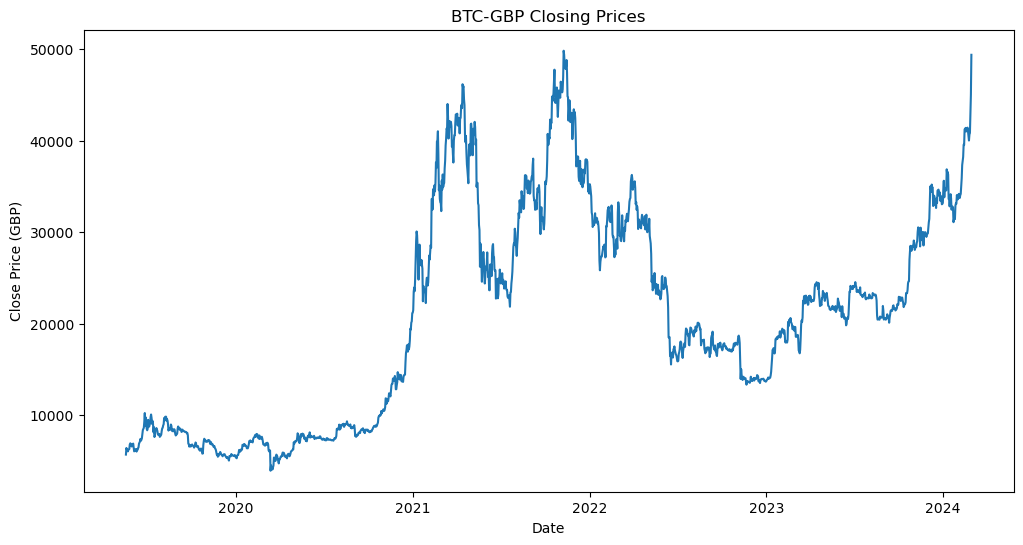

In [72]:
# Plot the data to visualize it
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'])
plt.title('BTC-GBP Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (GBP)')
plt.show()

Close        1.000000
Adj Close    1.000000
High         0.998904
Low          0.998683
Open         0.997558
Volume       0.207464
Name: Close, dtype: float64


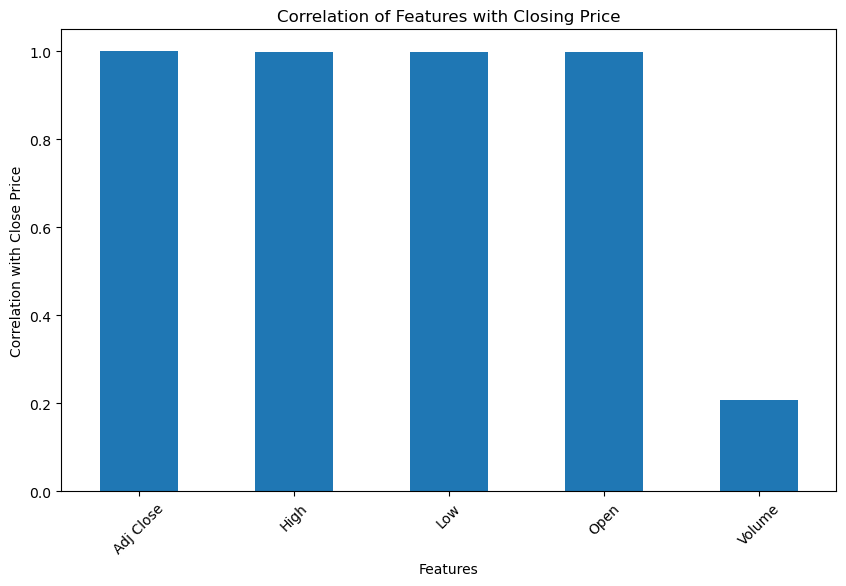

In [73]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation of each feature with the 'Close' price
correlation_with_close = correlation_matrix['Close'].sort_values(ascending=False)
print(correlation_with_close)

# Plot the correlation of each feature with the closing price
plt.figure(figsize=(10, 6))
correlation_with_close.drop('Close').plot(kind='bar')
plt.title('Correlation of Features with Closing Price')
plt.xlabel('Features')
plt.ylabel('Correlation with Close Price')
plt.xticks(rotation=45)
plt.show()


Prohet

In [74]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

# Load the data
dataph = pd.read_csv('Processed_BTC-GBP.csv')


# Rename columns to fit Prophet's requirements
dataph.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Check if the renaming was successful
print(dataph.columns)

# Ensure data is sorted by date
dataph.sort_values(by='ds', inplace=True)

# Display the first few rows of the dataset
print(dataph.head())


Index(['ds', 'Open', 'High', 'Low', 'y', 'Adj Close', 'Volume'], dtype='object')
           ds         Open         High          Low            y  \
0  2019-05-18  5772.200195  5855.231445  5701.313965  5716.805664   
1  2019-05-19  5714.254395  6491.663086  5714.254395  6439.563965   
2  2019-05-20  6438.962402  6441.934082  6031.836426  6268.142578   
3  2019-05-21  6267.875488  6344.120117  6159.029785  6266.939941   
4  2019-05-22  6261.402832  6288.818359  6015.045898  6064.633789   

     Adj Close        Volume  
0  5716.805664  1.678927e+10  
1  6439.563965  2.034723e+10  
2  6268.142578  1.873252e+10  
3  6266.939941  1.977451e+10  
4  6064.633789  1.951995e+10  


In [76]:
# Initialize the Prophet model with hyperparameters
model = Prophet(
    changepoint_prior_scale=0.05, # default is 0.05
    seasonality_prior_scale=10.0, # default is 10.0
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False, # can be set to True if needed
    seasonality_mode='multiplicative' # default is 'additive'
)

# Fit the model on the entire dataset
model.fit(dataph)


00:29:25 - cmdstanpy - INFO - Chain [1] start processing
00:29:26 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
#Prediction
# Make future dataframe for predictions
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Ensure 'ds' column in 'dataph' is in datetime format
dataph['ds'] = pd.to_datetime(dataph['ds'])

# Merge the forecast with actual data for comparison
result = dataph.merge(forecast[['ds', 'yhat']], on='ds')
result = result.dropna()

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mse, mape

train_rmse, train_mae, train_mse, train_mape = calculate_metrics(result['y'], result['yhat'])

print(f'RMSE: {train_rmse}, MAE: {train_mae}, MSE: {train_mse}, MAPE: {train_mape}')


RMSE: 2339.4966517696075, MAE: 1852.6983027447588, MSE: 5473244.583641204, MAPE: 11.262689512909121


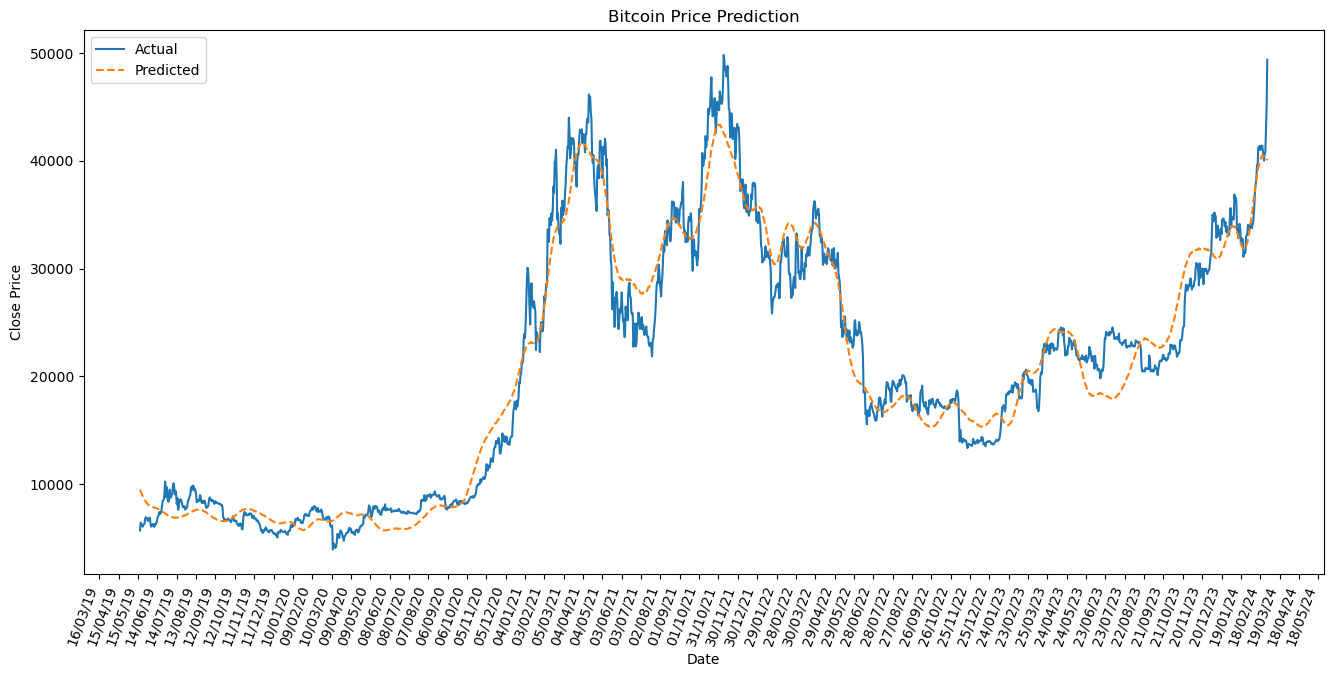

C:\Users\SAM\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\SAM\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\SAM\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array

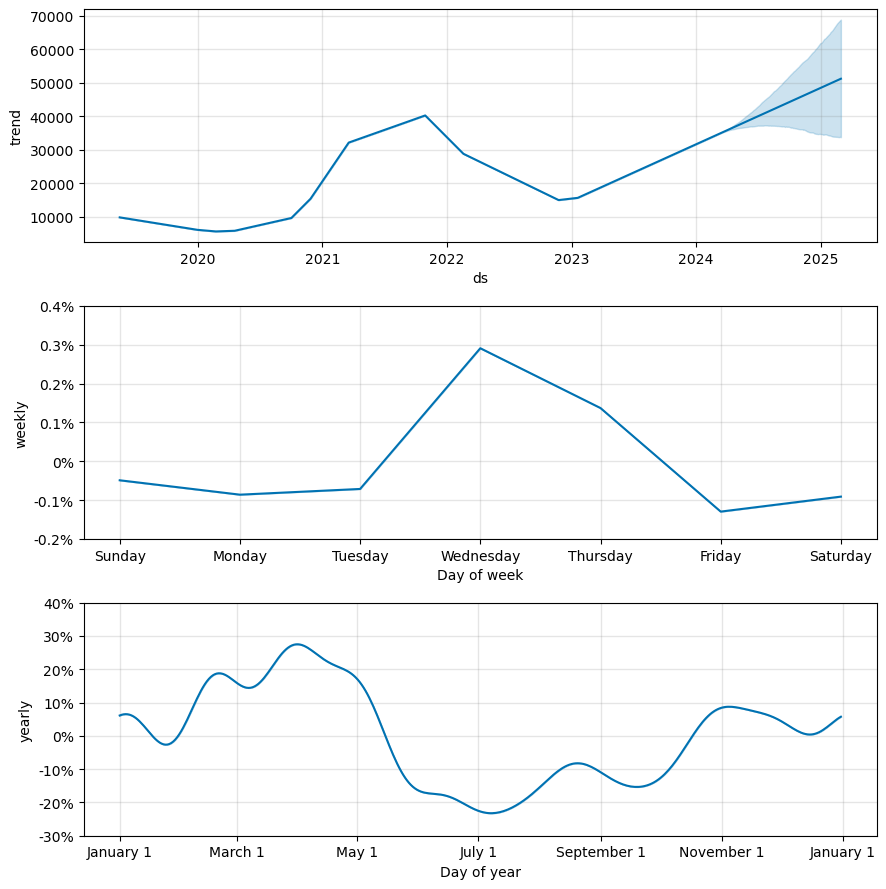

In [78]:
# Plot the actual vs predicted values
plt.figure(figsize=(16, 8))
plt.plot(result['ds'], result['y'], label='Actual')
plt.plot(result['ds'], result['yhat'], label='Predicted', linestyle='--')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=30))  # Adjust interval for more frequent date ticks

# Adjust the rotation and alignment of the x-axis labels
plt.gcf().autofmt_xdate(rotation=70, ha='right')

plt.show()

# Plot the Prophet components
model.plot_components(forecast)
plt.show()

XGBOOST

In [79]:
import xgboost as xgb

In [80]:
# Load the data
dataXg = pd.read_csv('Processed_BTC-GBP.csv')

# Sort the data by date
dataXg = dataXg.sort_values('Date')

# Set the 'Date' column as the index
dataXg.set_index('Date', inplace=True)

# Display the first few rows of the dataset
print(dataXg.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-05-18  5772.200195  5855.231445  5701.313965  5716.805664  5716.805664   
2019-05-19  5714.254395  6491.663086  5714.254395  6439.563965  6439.563965   
2019-05-20  6438.962402  6441.934082  6031.836426  6268.142578  6268.142578   
2019-05-21  6267.875488  6344.120117  6159.029785  6266.939941  6266.939941   
2019-05-22  6261.402832  6288.818359  6015.045898  6064.633789  6064.633789   

                  Volume  
Date                      
2019-05-18  1.678927e+10  
2019-05-19  2.034723e+10  
2019-05-20  1.873252e+10  
2019-05-21  1.977451e+10  
2019-05-22  1.951995e+10  


In [61]:
# Create lag features
def create_lag_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    return df

lag = 5
dataXg = create_lag_features(dataXg, lag)

# Drop rows with NaN values created by lagging
dataXg = dataXg.dropna()

# Split features and target
X = dataXg.drop(columns=['Close'])
y = dataXg['Close']

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Ensure the indices align
X_train.index = y_train.index
X_test.index = y_test.index


In [62]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [63]:
# Make predictions on the training set
train_predict = best_xgb_model.predict(X_train)
test_predict = best_xgb_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mse, mape

train_rmse, train_mae, train_mse, train_mape = calculate_metrics(y_train, train_predict)
test_rmse, test_mae, test_mse, test_mape = calculate_metrics(y_test, test_predict)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}, Train MSE: {train_mse}, Train MAPE: {train_mape}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}, Test MSE: {test_mse}, Test MAPE: {test_mape}')


Train RMSE: 85.76981355569472, Train MAE: 57.89090738810482, Train MSE: 7356.460917378634, Train MAPE: 0.3560792215635982
Test RMSE: 296.73139399007835, Test MAE: 198.2366693660459, Test MSE: 88049.5201792951, Test MAPE: 0.8245793152610174


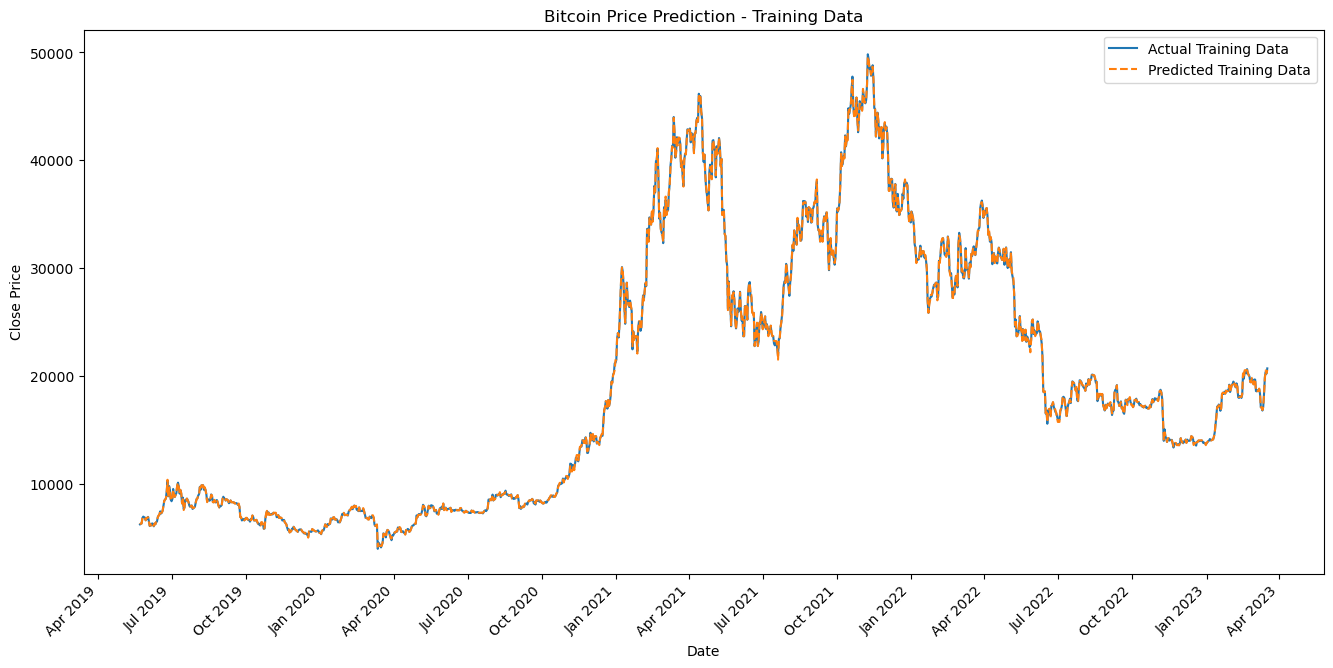

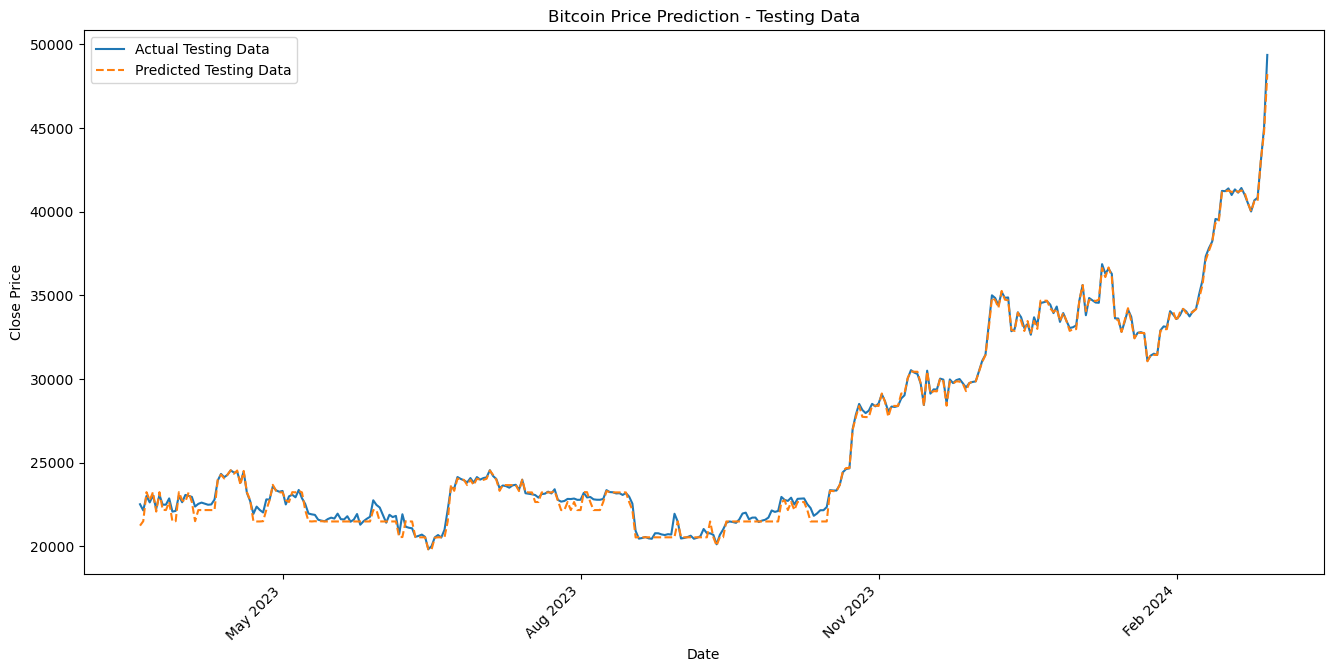

In [64]:
# If the indices are not in datetime format, convert them
if not pd.api.types.is_datetime64_any_dtype(y_train.index):
    y_train.index = pd.to_datetime(y_train.index)

if not pd.api.types.is_datetime64_any_dtype(y_test.index):
    y_test.index = pd.to_datetime(y_test.index)

# Visualize the actual vs predicted values for training data
plt.figure(figsize=(16, 8))
plt.plot(y_train.index, y_train, label='Actual Training Data')
plt.plot(y_train.index, train_predict, label='Predicted Training Data', linestyle='--')
plt.title('Bitcoin Price Prediction - Training Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))  # Show only month and year
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))  # Show every 3rd month
plt.gcf().autofmt_xdate(rotation=45, ha='right')
plt.show()

# Visualize the actual vs predicted values for testing data
plt.figure(figsize=(16, 8))
plt.plot(y_test.index, y_test, label='Actual Testing Data')
plt.plot(y_test.index, test_predict, label='Predicted Testing Data', linestyle='--')
plt.title('Bitcoin Price Prediction - Testing Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))  # Show only month and year
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))  # Show every 3rd month
plt.gcf().autofmt_xdate(rotation=45, ha='right')
plt.show()

LSTM

In [84]:
# Load the processed data
file_path = 'Processed_BTC-GBP.csv'  # Update this path as necessary
dataLSTM = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print(dataLSTM.head())


         Date         Open         High          Low        Close  \
0  2019-05-18  5772.200195  5855.231445  5701.313965  5716.805664   
1  2019-05-19  5714.254395  6491.663086  5714.254395  6439.563965   
2  2019-05-20  6438.962402  6441.934082  6031.836426  6268.142578   
3  2019-05-21  6267.875488  6344.120117  6159.029785  6266.939941   
4  2019-05-22  6261.402832  6288.818359  6015.045898  6064.633789   

     Adj Close        Volume  
0  5716.805664  1.678927e+10  
1  6439.563965  2.034723e+10  
2  6268.142578  1.873252e+10  
3  6266.939941  1.977451e+10  
4  6064.633789  1.951995e+10  


In [86]:
# Convert the 'Date' column to datetime format
dataLSTM['Date'] = pd.to_datetime(dataLSTM['Date'])

# Sort the data by date
dataLSTM = dataLSTM.sort_values('Date')

# Set the 'Date' column as the index
dataLSTM.set_index('Date', inplace=True)

# Display the first few rows to verify the indexing
print(dataLSTM.head())

# Ensure no numerical operations are performed on 'Date'
numerical_columns = dataLSTM.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-05-23  6062.616211  6273.211914  5961.410156  6223.923828  6223.923828   
2019-05-24  6224.151367  6407.894531  6178.333496  6282.347168  6282.347168   
2019-05-25  6285.897461  6385.520020  6265.519043  6334.090820  6334.090820   
2019-05-26  6336.184570  6829.103516  6233.505859  6815.794922  6815.794922   
2019-05-27  6816.840820  7024.616211  6804.933594  6944.333496  6944.333496   

                  Volume        lag_1        lag_2        lag_3        lag_4  \
Date                                                                           
2019-05-23  1.931263e+10  6064.633789  6266.939941  6268.142578  6439.563965   
2019-05-24  2.038630e+10  6223.923828  6064.633789  6266.939941  6268.142578   
2019-05-25  1.750710e+10  6282.347168  6223.923828  6064.633789  6266.939941   
2019-05-26  2.096472e+10  6334.090820  6282.34

In [88]:
# Create lag features
def create_lag_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    return df

lag = 5
dataLSTM = create_lag_features(dataLSTM, lag)

# Drop rows with NaN values created by lagging
dataLSTM = dataLSTM.dropna()

# Split features and target
X = dataLSTM.drop(columns=['Close'])
y = dataLSTM['Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshape data to 3D format [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Ensure the indices align
X_train_idx = X.index[:train_size]
X_test_idx = X.index[train_size:]


In [89]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


C:\Users\SAM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0601 - val_loss: 0.0052
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - val_loss: 7.8305e-04
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 5.6128e-04
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 1.5467e-04
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 3.5420e-04
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 2.2196e-04
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 1.9524e-04
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 1.7906e-04
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 5.2221e-04
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

In [45]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mse, mape

train_rmse, train_mae, train_mse, train_mape = calculate_metrics(y_train_inv, train_predict_inv)
test_rmse, test_mae, test_mse, test_mape = calculate_metrics(y_test_inv, test_predict_inv)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}, Train MSE: {train_mse}, Train MAPE: {train_mape}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}, Test MSE: {test_mse}, Test MAPE: {test_mape}')


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 864.465721952291, Train MAE: 689.0718853745744, Train MSE: 747300.9844304956, Train MAPE: 4.493651775000622
Test RMSE: 1019.1569470591962, Test MAE: 941.9776427131089, Test MSE: 1038680.8827390213, Test MAPE: 3.6589757830709355


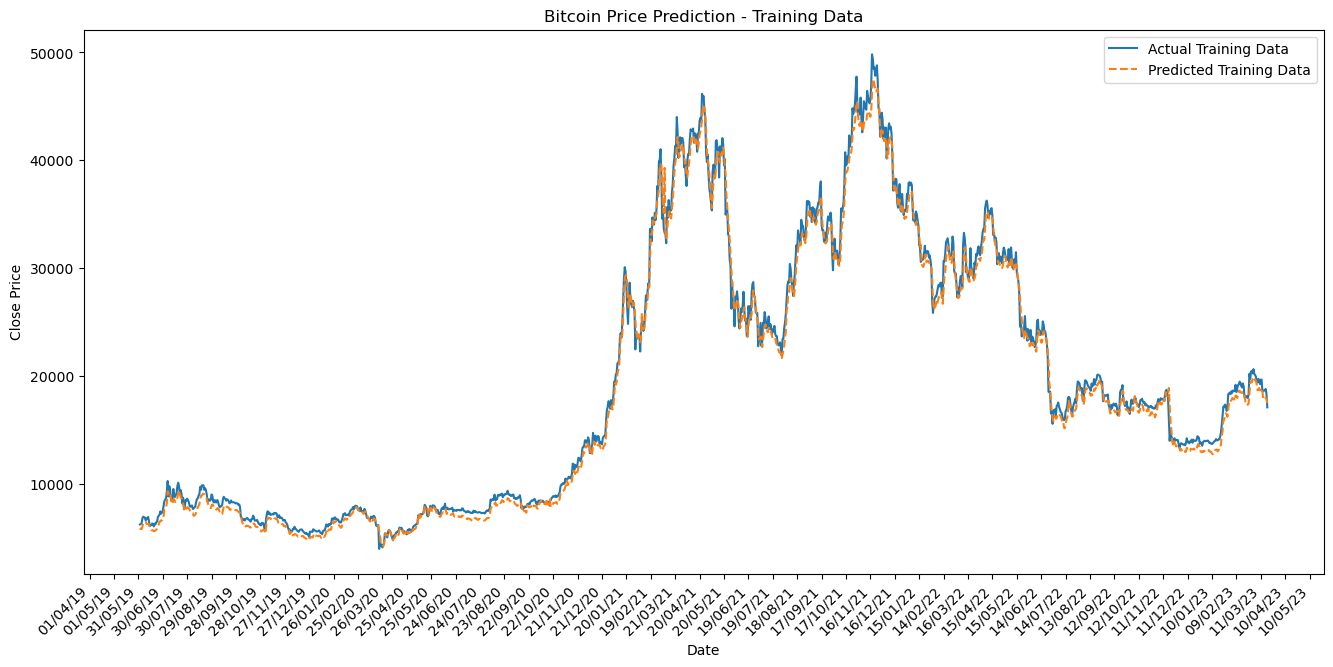

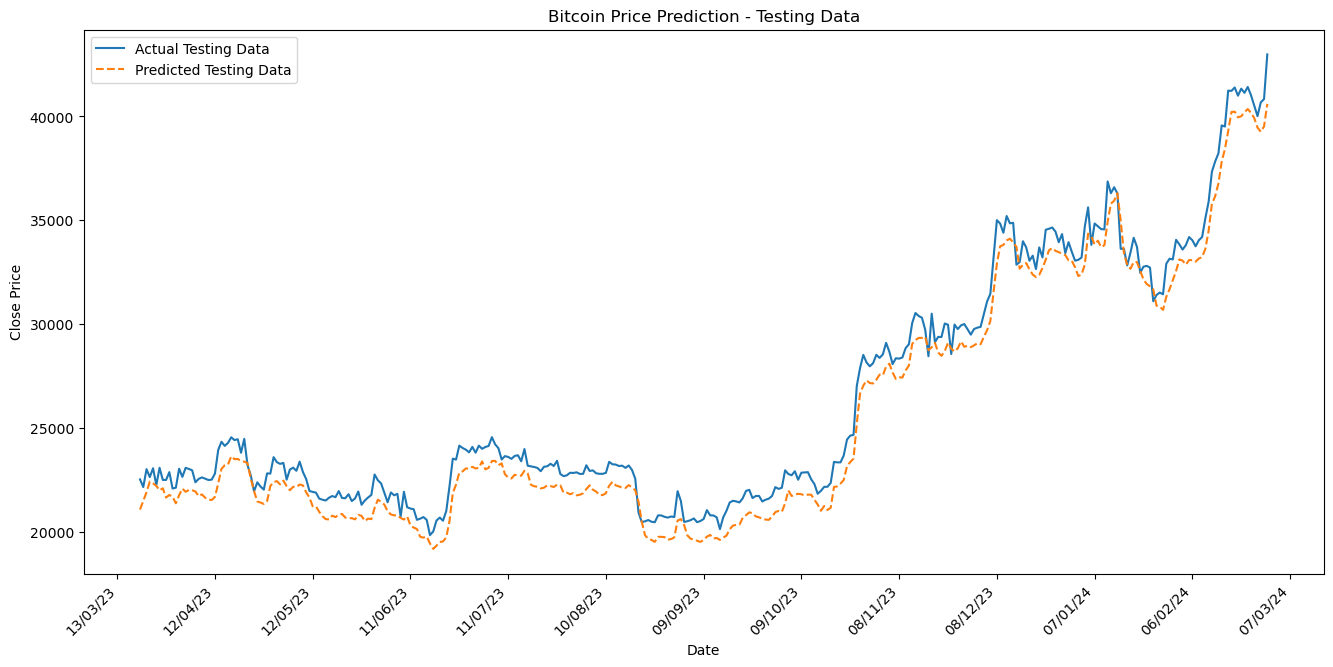

In [91]:
# Ensure the lengths match
min_length_train = min(len(X_train_idx), len(y_train_inv), len(train_predict_inv))
X_train_idx = X_train_idx[:min_length_train]
y_train_inv = y_train_inv[:min_length_train]
train_predict_inv = train_predict_inv[:min_length_train]

min_length_test = min(len(X_test_idx), len(y_test_inv), len(test_predict_inv))
X_test_idx = X_test_idx[:min_length_test]
y_test_inv = y_test_inv[:min_length_test]
test_predict_inv = test_predict_inv[:min_length_test]

# Plot the training data
plt.figure(figsize=(16, 8))
plt.plot(X_train_idx, y_train_inv.flatten(), label='Actual Training Data')
plt.plot(X_train_idx, train_predict_inv.flatten(), label='Predicted Training Data', linestyle='--')
plt.title('Bitcoin Price Prediction - Training Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=30))
plt.gcf().autofmt_xdate(rotation=45, ha='right')
plt.show()

# Plot the testing data
plt.figure(figsize=(16, 8))
plt.plot(X_test_idx, y_test_inv.flatten(), label='Actual Testing Data')
plt.plot(X_test_idx, test_predict_inv.flatten(), label='Predicted Testing Data', linestyle='--')
plt.title('Bitcoin Price Prediction - Testing Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=30))
plt.gcf().autofmt_xdate(rotation=45, ha='right')
plt.show()